# PyTorch for CIFAR10
We test ResNet classifier.
First init some basic environment.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

### FcNN classifier

In [1]:
import numpy as np

In [2]:
import torch.optim as optim
import torch.nn as nn
import time
import sys
sys.path.append("cifar10/")


import copy

In [3]:
def load_pandas_df(file_name):
    df = pd.read_pickle(file_name)
    
    return df    

In [7]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import seaborn as sns
import pandas as pd
sns.set_theme()



# sns.set(font_scale=1, rc={'text.usetex': True, 'text.latex.preamble': r"\usepackage{bm} \usepackage{amsmath}"})
# # sns.set(rc={'text.usetex': True, 'text.latex.preamble': latex_preamble})

# sns.set_style('whitegrid')
# plt.rcParams.update({
#     'text.usetex': True,
#     'font.family': 'serif',
# })

sns.set_context("talk")


In [76]:

# pruned_weights = [0.0, 0.2, 0.4, 0.6, 0.8]

# training_infos = []
# for p_w in pruned_weights:
#     fn = f'panda_dataframes/training_information_FcNNpruned_weights={p_w}.pkl'
#     df = load_pandas_df(fn)
#     df = df.astype({'loss':float, 'acc':float, 'loss_mb':float, 'acc_mb':float})
#     training_infos.append(df)
    
fn = 'panda_dataframes/training_information_training_n=1000_cifar-10_NOTwhitened_init=0_d=3072_m=[128]_L=[3]_relu_SGD_lr=0.01_BS=64.pkl'

df = load_pandas_df(fn)
df = df.astype({'loss':float, 'acc':float})
df

FileNotFoundError: [Errno 2] No such file or directory: 'panda_dataframes/training_information_training_n=1000_cifar-10_NOTwhitened_init=0_d=3072_m=[128]_L=[3]_relu_SGD_lr=0.05_BS=64.pkl'

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


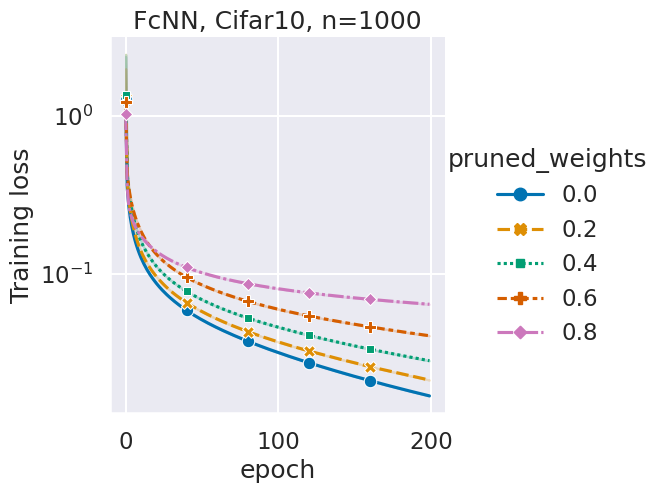

In [74]:
sns.relplot(df, x='epoch', y='loss', hue='pruned_weights', style='pruned_weights', markers=True, markevery=40, kind='line', palette='colorblind')

plt.yscale('log')
plt.ylabel('Training loss')
plt.title('FcNN, Cifar10, n=1000')
plt.savefig('FcNN_training_loss_pruned_weights.pdf', bbox_inches='tight')

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'FcNN, Cifar10, n=1000')

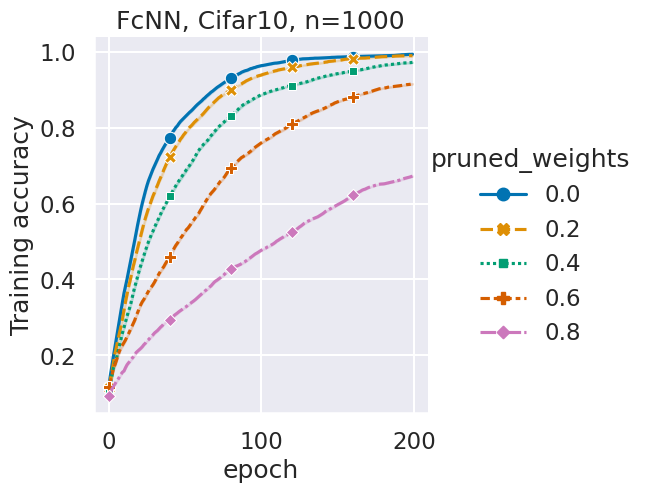

In [75]:
sns.relplot(df, x='epoch', y='acc', hue='pruned_weights', style='pruned_weights', markers=True, markevery=40, kind='line', palette='colorblind')

# plt.yscale('log')
plt.ylabel('Training accuracy')
plt.title('FcNN, Cifar10, n=1000')

In [28]:
# pruned_weights = [0.0, 0.2, 0.4, 0.6, 0.8]
# epoch = 199

# dfs = []
# for p_w in pruned_weights:
#     fn = f'panda_dataframes/outer_prod_hessian_information_FcNN_pruned_weights={p_w}_{epoch}.pkl'

#     df = load_pandas_df(fn)

#     df = df.astype({'H_o_cond': float, 'H_o_rank': int, 'lambda_max_H_o': float, 'lambda_min_H_o': float})

#     dfs.append(df)

# hession_info_fcnn = pd.concat(dfs,ignore_index=True)
# hession_info_fcnn

,dataset,num_samples,network,pruned_weights,epoch,H_o_cond,H_o_spectrum,H_o_rank,lambda_max_H_o,lambda_min_H_o
0,Cifar10,1000,FcNN,0.0,0,22179.248457,"[tensor(0.1917, dtype=torch.float64), tensor(0...",10000,4250.764417,0.191655
1,Cifar10,1000,FcNN,0.0,40,60542.278971,"[tensor(0.2424, dtype=torch.float64), tensor(0...",10000,14675.250664,0.242397
2,Cifar10,1000,FcNN,0.0,80,107922.692858,"[tensor(0.3553, dtype=torch.float64), tensor(0...",10000,38347.297536,0.355322
3,Cifar10,1000,FcNN,0.0,120,163697.963588,"[tensor(0.4266, dtype=torch.float64), tensor(0...",10000,69838.660311,0.426631
4,Cifar10,1000,FcNN,0.0,160,207643.249838,"[tensor(0.4718, dtype=torch.float64), tensor(0...",10000,97964.546639,0.471793
5,Cifar10,1000,FcNN,0.0,199,260236.754388,"[tensor(0.4732, dtype=torch.float64), tensor(0...",10000,123138.158092,0.473177
6,Cifar10,1000,FcNN,0.2,0,24338.204332,"[tensor(0.1668, dtype=torch.float64), tensor(0...",10000,4060.209371,0.166825
7,Cifar10,1000,FcNN,0.2,40,50009.845349,"[tensor(0.2385, dtype=torch.float64), tensor(0...",10000,11926.545198,0.238484
8,Cifar10,1000,FcNN,0.2,80,83782.123835,"[tensor(0.3422, dtype=torch.float64), tensor(0...",10000,28667.750840,0.342170
9,Cifar10,1000,FcNN,0.2,120,104611.498625,"[tensor(0.5210, dtype=torch.float64), tensor(0...",10000,54502.520902,0.520999


In [61]:
hession_info_fcnn = load_pandas_df('panda_dataframes/outer_prod_hessian_information_FcNN_pruned_weights_Kaiming_init.pkl')

In [62]:
# for i in range(30):
#     print(i)
#     spec = hession_info_resnet20.loc[i].H_o_spectrum
#     spec[spec < 0] = 0
    
#     rank = torch.linalg.matrix_rank(torch.diag(spec), atol=1e-7)
    
#     hession_info_resnet20.H_o_rank.loc[i] = int(rank)
#     hession_info_resnet20.lambda_min_H_o.loc[i] = float(test[-rank])
    
    
#     hession_info_resnet20.H_o_cond.loc[i] = hession_info_resnet20.loc[i].lambda_max_H_o/float(test[-rank])

In [63]:
sns.set_theme()
sns.set_context("talk")

def plot_hessian_info(df,y):
    
    sns.relplot(df, x='epoch', y=y, hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')
    


/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


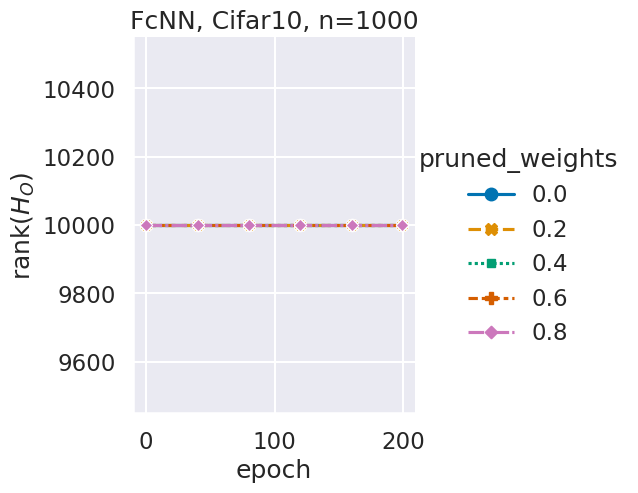

In [64]:
plot_hessian_info(hession_info_fcnn,'H_o_rank')
plt.ylabel('rank$(H_O)$')

plt.title('FcNN, Cifar10, n=1000')
plt.savefig('FcNN_rank_HO.pdf', bbox_inches='tight')

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


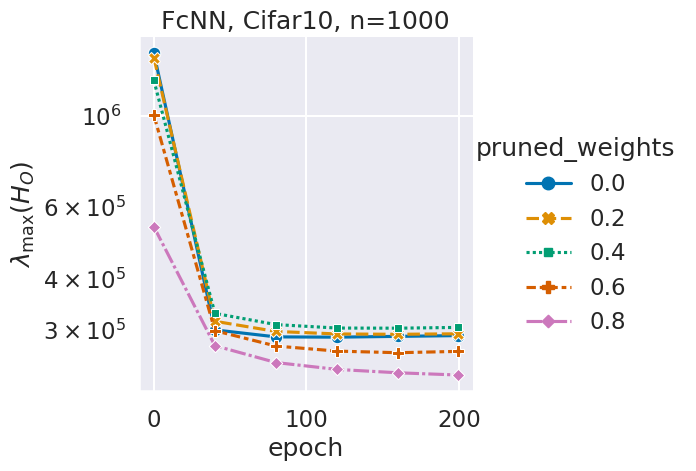

In [65]:
plot_hessian_info(hession_info_fcnn,'lambda_max_H_o')
plt.yscale('log')
plt.ylabel('$\lambda_{\max}(H_O)$')

plt.title('FcNN, Cifar10, n=1000')
plt.savefig('FcNN_lam_max_HO.pdf', bbox_inches='tight')

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


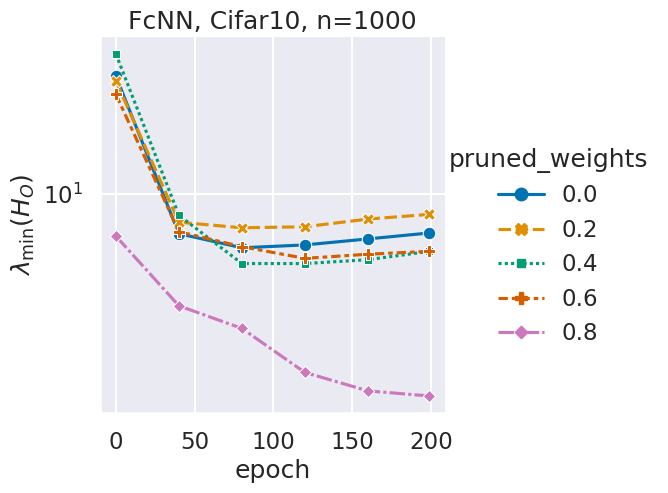

In [66]:
plot_hessian_info(hession_info_fcnn,'lambda_min_H_o')
plt.yscale('log')
plt.ylabel('$\lambda_{\min}(H_O)$')

plt.title('FcNN, Cifar10, n=1000')
plt.savefig('FcNN_lam_min_HO.pdf', bbox_inches='tight')

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


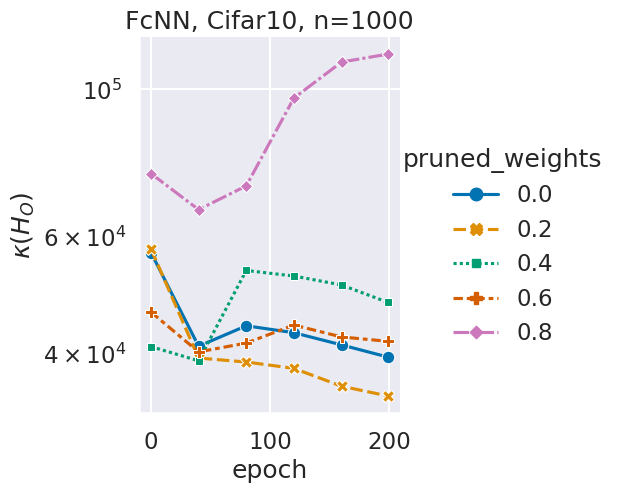

In [67]:
plot_hessian_info(hession_info_fcnn,'H_o_cond')
plt.yscale('log')
plt.ylabel('$\kappa(H_O)$')

plt.title('FcNN, Cifar10, n=1000')
plt.savefig('FcNN_cond_HO.pdf', bbox_inches='tight')

In [51]:
np.log(sum((hession_info_fcnn[hession_info_fcnn['pruned_weights'] == 0.0].H_o_cond)))

12.488808655131574

In [52]:
np.log(sum((hession_info_fcnn[hession_info_fcnn['pruned_weights'] == 0.2].H_o_cond)))

12.403948512332029

In [53]:
np.log(sum((hession_info_fcnn[hession_info_fcnn['pruned_weights'] == 0.4].H_o_cond)))

12.556523727846123

In [54]:
np.log(sum((hession_info_fcnn[hession_info_fcnn['pruned_weights'] == 0.6].H_o_cond)))

12.452679139558077

In [55]:
np.log(sum((hession_info_fcnn[hession_info_fcnn['pruned_weights'] == 0.8].H_o_cond)))

13.18384246507033